In [1]:
import glob                 #To get files from folder
import pandas as pd         #To read those files
import numpy as np          #To do mathematical operation
import os                   #Files manupulation 

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB                       #Model import from sklearn
from sklearn.feature_extraction.text import CountVectorizer          
from sklearn.model_selection import train_test_split                 
from sklearn.metrics import accuracy_score                           #How the classifire works/ How accruate it is!
import time                                                          #How much time it take to run
import re                                                            #Replacement
from sklearn.pipeline import Pipeline                                
from sklearn.feature_extraction.text import TfidfTransformer         
from sklearn.metrics import confusion_matrix                         #Model description with color 
import joblib                                                        


In [2]:
all_file = glob.glob("../songData/*.xlsx")
len(all_file)

21

In [3]:
all_file

g = all_file[2]
g.split('\\')[1][:-5]

'songType10'

In [4]:
names = []
count = []
clusters = []
data = []

for each in all_file:
    temp = pd.read_excel(each,engine='openpyxl')
    
    
    count.append(len(temp))
    names.append(each.split('/')[1][:-5])
    clusters.append(temp['songType'])
    
    
    data.append(temp)
    
cluster_ids =clusters    

In [5]:
data = pd.concat(data)
data = data.sample(frac =1)

data

,Unnamed: 0,lyrics,songType
2,516,নতুন ভোর উঠল সুরে দিল তোমার ঘুমকে তুলে তখন আমি...,8
72,1209,আকাশ হতে খসল তারা আঁধার রাতে পথহারা ॥ প...,17
61,139,"মন তো ছোঁয়া যাবে না, ধরা সেতো দেবে না, ভালোবাস...",3
7,403,"তোমার বিয়ের রাতে, নেশায় মাতাল হবো না তোমার দুঃ...",9
387,2430,"জানালার বাহিরে দেখি কত রং কত উত্সব, পর্দার আড়া...",13
...,...,...,...
100,1241,আমি তখন ছিলেম মগন গহন ঘুমের ঘোরে যখন ...,17
317,1619,"শত শত হাল দেয়া জমিনে আমি ভালবাসবো না, তাই আকা...",13
139,624,এবার পূজোয় চাই আমায় বেনারসি শাড়িরে- নইলে যে তো...,1
956,3919,"বসে আছো সামনে দেখছি তোমায়, অপলকে চেয়ে আছি নেই ...",1


In [6]:
data['lyrics']

2      নতুন ভোর উঠল সুরে দিল তোমার ঘুমকে তুলে তখন আমি...
72     আকাশ হতে খসল তারা   আঁধার রাতে পথহারা ॥      প...
61     মন তো ছোঁয়া যাবে না, ধরা সেতো দেবে না, ভালোবাস...
7      তোমার বিয়ের রাতে, নেশায় মাতাল হবো না তোমার দুঃ...
387    জানালার বাহিরে দেখি কত রং কত উত্সব, পর্দার আড়া...
                             ...                        
100    আমি   তখন ছিলেম মগন গহন ঘুমের ঘোরে      যখন   ...
317    শত শত হাল দেয়া জমিনে আমি ভালবাসবো না, তাই আকা...
139    এবার পূজোয় চাই আমায় বেনারসি শাড়িরে- নইলে যে তো...
956    বসে আছো সামনে দেখছি তোমায়, অপলকে চেয়ে আছি নেই ...
454    বাঁশিতে মরণ ছিল বাধা সে কথা জেনেই মরলো রাধা আম...
Name: lyrics, Length: 4105, dtype: object

In [7]:
stopwords = ['হাই', 'ফ্রিকুয়েন্সি', 'কিন্তু', 'অপ্রয়োজনীয়', 'শব্দ', 'অবশ্য',
'অনেক',
'অনেকে',
'অনেকেই',
'অন্তত',
'অথবা',
'অথচ',
'অর্থাত',
'অন্য',
'আজ',
'আছে',
'আপনার',
'আপনি',
'আবার',
'আমরা',
'আমাকে',
'আমাদের',
'আমার',
'আমি',
'আরও',
'আর',
'আগে',
'আগেই',
'আই',
'অতএব',
'আগামী',
'অবধি',
'অনুযায়ী',
'আদ্যভাগে',
'এই',
'একই',
'একে',
'একটি',
'এখন',
'এখনও',
'এখানে',
'এখানেই',
'এটি',
'এটা',
'এটাই',
'এতটাই',
'এবং',
'একবার',
'এবার',
'এদের',
'এঁদের',
'এমন',
'এমনকী',
'এল',
'এর',
'এরা',
'এঁরা',
'এস',
'এত',
'এতে',
'এসে',
'একে',
'এ',
'ঐ',
 'ই',
'ইহা',
'ইত্যাদি',
'উনি',
'উপর',
'উপরে',
'উচিত',
'ও',
'ওই',
'ওর',
'ওরা',
'ওঁর',
'ওঁরা',
'ওকে',
'ওদের',
'ওঁদের',
'ওখানে',
'কত',
'কবে',
'করতে',
'কয়েক',
'কয়েকটি',
'করবে',
'করলেন',
'করার',
'কাছে',
'কাজে',
'কারণ',
'কিছু',
'কিছুই',
'কিন্তু',
'কিংবা',
'কি',
'কী',
'কেন',
'কে',
'কোনও',
'কোনো',
'ক্ষেত্রে',
'খুব',
'গুলি'
'গিয়ে',
'গোটা',
'চলে',
'ছাড়া',
'ছাড়াও',
'ছিলেন',
'ছিল',
'জন্য',
'জানা',
'ঠিক',
'তিনি',
'তিনঐ',
'তিনিও',
'তেমন',
'তাকে',
'তাহা',
'তাহাতে',
'তাহার',
'তাদের',
'তিনি',
'তা',
'তুমি',
'তোমার',
'তথা',
'না',
'পারে',
'ব্যবহার',
'বললেন',
'যখন',
'যদি',
'টি' ]


In [8]:
data['lyrics'] = data['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [9]:
X_train, X_test, y_train, y_test =  train_test_split(data['lyrics'], data['songType'], test_size=0.33, random_state=42 )

In [10]:
X_train.shape

(2750,)

In [11]:
X_test.shape

(1355,)

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics

total_data_count = len(data)
per_class_counts = []
# unique_classes = np.unique(data['idx'].values)
unique_classes = np.unique(data['songType'].values)

class_count_mean = np.mean(count)

###########################3
############### classifier setup ################

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([
    
    ('vect', CountVectorizer(stop_words=stopwords,
                            analyzer="word", 
                            lowercase=False,
                            token_pattern="[\S]*",
                            tokenizer=None,
                            ngram_range=(1, 3),
                            preprocessor=None)),                 
    ('tfidf', TfidfTransformer()),
    ('clf-svm', MLPClassifier(random_state=1, max_iter=300)),
                                                                        
])
classifier = text_clf_svm.fit(list(X_train), list(y_train))


cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
score = cross_val_score(text_clf_svm, list(X_train), list(y_train), cv=cv)

print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


predicted = classifier.predict(X_test)

C:\Users\MANSTEIN\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [''] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [ ]:
print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(metrics.classification_report(y_test, predicted))

In [ ]:
import pandas as pd
confusion_matrix = list(metrics.confusion_matrix(y_test, predicted))

print(len(confusion_matrix), len(confusion_matrix[0]))
print(len(names), len(names[0]))

<AxesSubplot:>

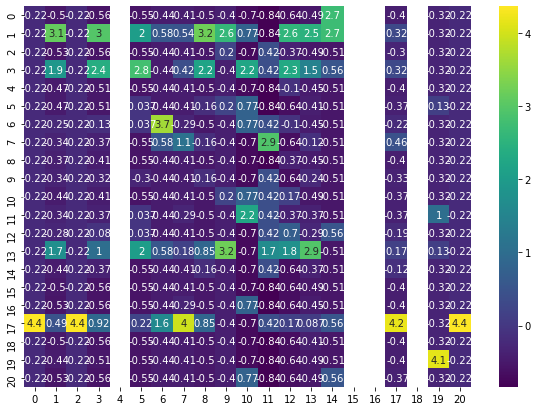

In [27]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix
# df_cm = pd.DataFrame(array, index = [i for i in names],
#               columns = [i for i in names])
df_cm = pd.DataFrame(array)
df_norm_col=(df_cm-df_cm.mean())/df_cm.std()
#df_norm_col=df_cm-df_cm.mean()
plt.figure(figsize = (10,7))
sn.heatmap(df_norm_col, annot=True,cmap='viridis')